<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1>Neural Network Rectified Linear Unit (ReLU) vs Sigmoid</h1>



<h3>Objective for this Notebook<h3>    
<h5> 1. Define Several Neural Network, Criterion function, Optimizer.</h5>
<h5> 2. Test Sigmoid and Relu. </h5>
<h5> 3. Analyze Results. </h5>     


<h2>Table of Contents</h2>
<p>In this lab, you will test Sigmoid and Relu activation functions on the MNIST dataset with two hidden Layers.</p>

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Train">Define Several Neural Network, Criterion function, Optimizer</a></li>
    <li><a href="#Test">Test Sigmoid and Relu </a></li>
    <li><a href="#Result">Analyze Results</a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>

<hr>


We'll need the following libraries


In [1]:
!pip3 install torch torchvision torchaudio

In [2]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision

# PyTorch Library
import torch 
# PyTorch Neural Network
import torch.nn as nn
# Allows us to transform tensors
import torchvision.transforms as transforms
# Allows us to download datasets
import torchvision.datasets as dsets
# Allows us to use activation functions
import torch.nn.functional as F
# Used to graph data and loss curves
import matplotlib.pylab as plt
# Allows us to use arrays to manipulate and store data
import numpy as np
# Setting the seed will allow us to control randomness and give us reproducibility
torch.manual_seed(2)

<!--Empty Space for separating topics-->


<h2 id="Model">Neural Network Module and Training Function</h2> 


Define the neural network module or class, with two hidden Layers 


<img src="https://ibm.box.com/shared/static/5wtclahun0f70qlwkn2kxzh3amnbq4zg.png" width="200" alt="Neural Network Model">


In [3]:
# Create the model class using Sigmoid as the activation function

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        # D_in is the input size of the first layer (size of input layer)
        # H1 is the output size of the first layer and input size of the second layer (size of first hidden layer)
        # H2 is the outpout size of the second layer and the input size of the third layer (size of second hidden layer)
        # D_out is the output size of the third layer (size of output layer)
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self,x):
        # Puts x through the first layers then the sigmoid function
        x = torch.sigmoid(self.linear1(x)) 
        # Puts results of previous line through second layer then sigmoid function
        x = torch.sigmoid(self.linear2(x))
        # Puts result of previous line through third layer
        x = self.linear3(x)
        return x

Define the class for the Relu activation function 


In [4]:
# Create the model class using Relu as the activation function

class NetRelu(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        # D_in is the input size of the first layer (size of input layer)
        # H1 is the output size of the first layer and input size of the second layer (size of first hidden layer)
        # H2 is the outpout size of the second layer and the input size of the third layer (size of second hidden layer)
        # D_out is the output size of the third layer (size of output layer)
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self, x):
        # Puts x through the first layers then the relu function
        x = torch.relu(self.linear1(x))  
        # Puts results of previous line through second layer then relu function
        x = torch.relu(self.linear2(x))
        # Puts result of previous line through third layer
        x = self.linear3(x)
        return x

Define a function to  train the model, in this case, the function returns a Python dictionary to store the training loss and accuracy on the validation data 


In [5]:
# Model Training Function

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}  
    # Number of times we train on the entire training dataset
    for epoch in range(epochs):
        # For each batch in the train loader
        for i, (x, y) in enumerate(train_loader):
            # Resets the calculated gradient value, this must be done each time as it accumulates if we do not reset
            optimizer.zero_grad()
            # Makes a prediction on the image tensor by flattening it to a 1 by 28*28 tensor
            z = model(x.view(-1, 28 * 28))
            # Calculate the loss between the prediction and actual class
            loss = criterion(z, y)
            # Calculates the gradient value with respect to each weight and bias
            loss.backward()
            # Updates the weight and bias according to calculated gradient value
            optimizer.step()
            # Saves the loss
            useful_stuff['training_loss'].append(loss.data.item())
        
        # Counter to keep track of correct predictions
        correct = 0
        # For each batch in the validation dataset
        for x, y in validation_loader:
            # Make a prediction
            z = model(x.view(-1, 28 * 28))
            # Get the class that has the maximum value
            _, label = torch.max(z, 1)
            # Check if our prediction matches the actual class
            correct += (label == y).sum().item()
    
        # Saves the percent accuracy
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">Make Some Data</h2> 


Load the training dataset by setting the parameters <code>train</code> to <code>True</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>


In [6]:
# Create the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Load the testing dataset by setting the parameters <code>train</code> to <code>False</code> and convert it to a tensor  by placing a transform object int the argument <code>transform</code>


In [7]:
# Create the validating dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Create the criterion function  


In [8]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

Create the training-data loader and the validation-data loader object 


In [9]:
# Create the training data loader and validation data loader object

# Batch size is 2000 and shuffle=True means the data will be shuffled at every epoch
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
# Batch size is 5000 and the data will not be shuffled at every epoch
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

<!--Empty Space for separating topics-->


<h2 id="Train">Define Neural Network, Criterion function, Optimizer and Train the Model</h2> 


Create  the model with 100 hidden neurons  


In [10]:
# Set the parameters to create the model

input_dim = 28 * 28 # Diemension of an image
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10 # Number of classes

The epoch number in the video is 35. You can try 10 for now. If you try 35, it may take a long time.


In [11]:
# Set the number of iterations

cust_epochs = 10

<!--Empty Space for separating topics-->


<h2 id="Test">Test Sigmoid and Relu</h2> 


Train the network using the Sigmoid activation function


In [12]:
# Train the model with sigmoid function

learning_rate = 0.01
# Create an instance of the Net model
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
# Create an optimizer that updates model parameters using the learning rate and gradient
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# Train the model
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

Train the network using the Relu activation function


In [13]:
# Train the model with relu function

learning_rate = 0.01
# Create an instance of the NetRelu model
modelRelu = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
# Create an optimizer that updates model parameters using the learning rate and gradient
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
# Train the model
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

<!--Empty Space for separating topics-->


<h2 id="Result">Analyze Results</h2> 


Compare the training loss for each activation 


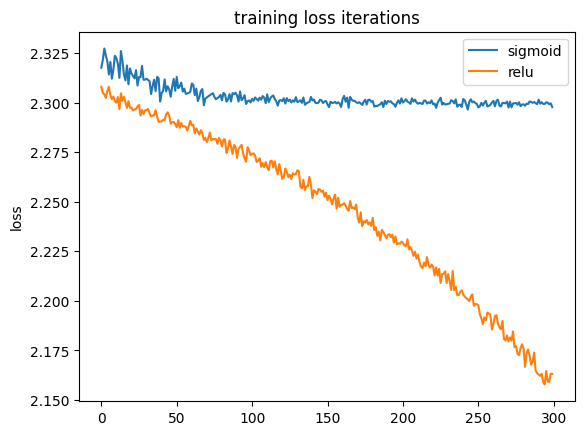

In [14]:
# Compare the training loss

plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

Compare the validation loss for each model  


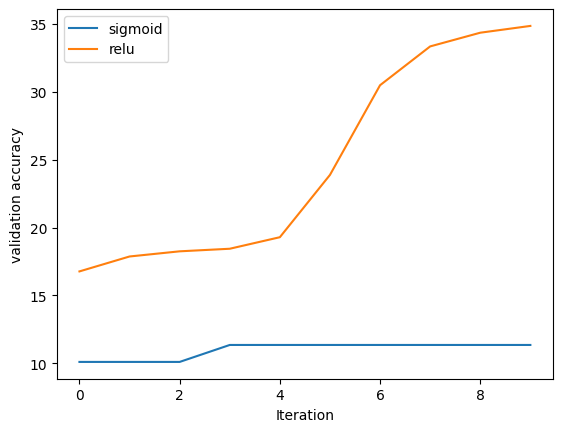

In [15]:
# Compare the validation loss

plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label = 'relu') 
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')   
plt.legend()



<a href="https://dataplatform.cloud.ibm.com/registration/stepone?utm_source=Exinfluencer&utm_content=000026UJ&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2023-01-01&utm_medium=Exinfluencer&utm_term=10006555&context=cpdaas&apps=data_science_experience%2Cwatson_machine_learning"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/Template/module%201/images/Watson_Studio.png"></a>


<!--Empty Space for separating topics-->


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2023-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD. 


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENCoursera872-2023-01-01">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>



## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-23  | 2.0  | Srishti  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
